<a href="https://colab.research.google.com/github/henamth/Mini-Project/blob/main/P_Hemanth_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

john-mcarthur-X_MOr6oa4-k-unsplash.jpg


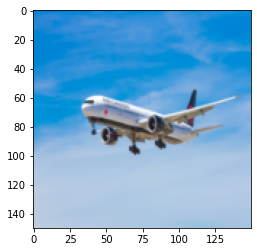

amarnath-tade-gXs-mwiXrhA-unsplash.jpg


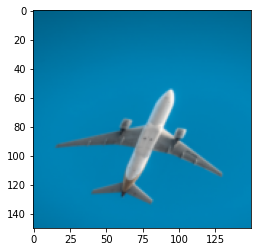

viktor-forgacs-hBJIdtTOmeE-unsplash.jpg


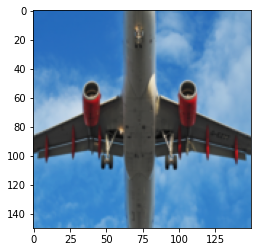

john-mcarthur-bAaeJ0XtiMI-unsplash.jpg


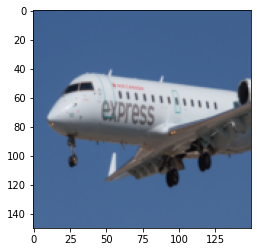

aaron-barnaby-A6HjuUdcURY-unsplash.jpg


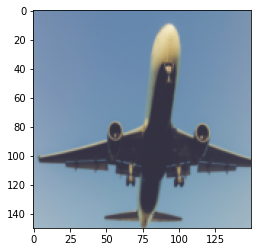

isaac-struna-wkQS9IfH_Hc-unsplash.jpg


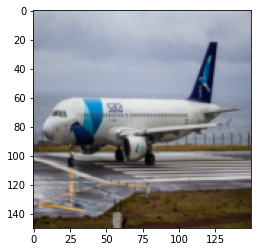

artturi-jalli-Su1gc1A63xE-unsplash.jpg


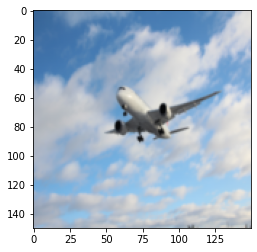

viktor-forgacs-1jhykJUftOc-unsplash.jpg


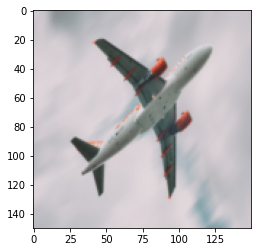

artturi-jalli-WUYFbcqrtiw-unsplash.jpg


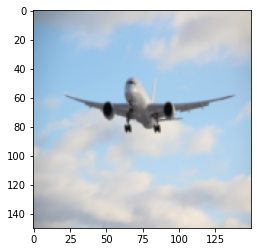

isabel-lee-bw1hXT_okL4-unsplash.jpg


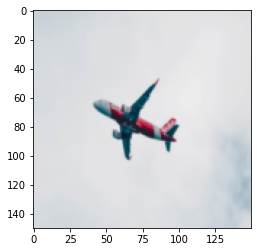

stefan-rodriguez-2AovfzYV3rc-unsplash.jpg


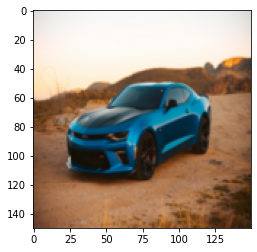

dima-black-DwxlhTvC16Q-unsplash.jpg


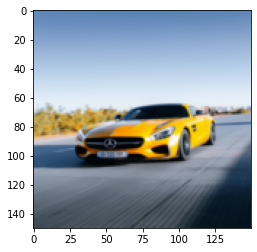

karl-kohler-Hf1rAKkfMAg-unsplash.jpg


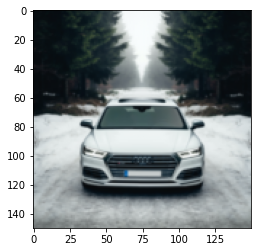

viktor-theo-aIDkOU7eGgo-unsplash.jpg


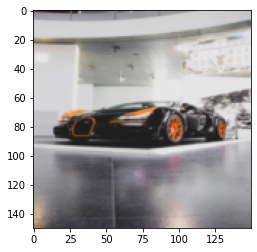

alistair-smith-fxliDZFt-qY-unsplash.jpg


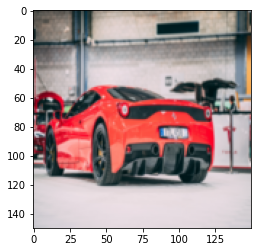

sgcdesignco-81Dfucag9OY-unsplash.jpg


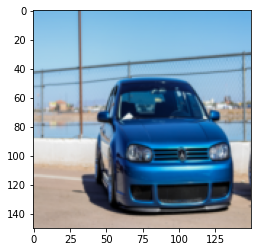

andrew-pons-Os7C4iw2rDc-unsplash.jpg


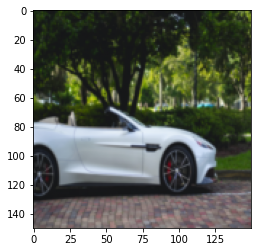

okan-younesi-hDA-DtoHuzs-unsplash.jpg


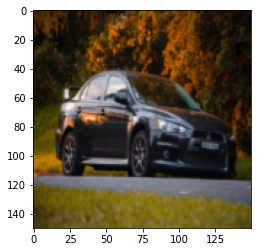

martin-katler-o5m44WdWHEc-unsplash.jpg


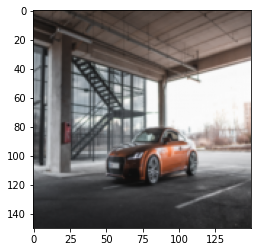

zachary-edmundson-Hrp8mzQxAyc-unsplash.jpg


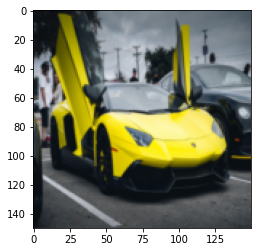

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

datadir = '/content/drive/MyDrive/my projects/mini project/image classification'

categories = ['aeroplanes','cars'] # Name the folder with these categories
target = []
flat_data = []
images = []

for i in categories:
  path = os.path.join(datadir,i)
  #print(path)
  for img in os.listdir(path):
    print(img)
    img_array = imread(os.path.join(path,img))

    img_resize = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)
    plt.imshow(img_resize)
    plt.show()

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
len(flat_data[0])

67500

In [ ]:
target

array(['aeroplanes', 'aeroplanes', 'aeroplanes', 'aeroplanes',
       'aeroplanes', 'aeroplanes', 'aeroplanes', 'aeroplanes',
       'aeroplanes', 'aeroplanes', 'cars', 'cars', 'cars', 'cars', 'cars',
       'cars', 'cars', 'cars', 'cars', 'cars'], dtype='<U10')

In [ ]:
np.unique(target,return_counts=True)

(array(['aeroplanes', 'cars'], dtype='<U10'), array([10, 10]))

<BarContainer object of 2 artists>

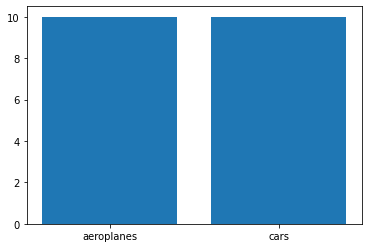

In [ ]:
plt.bar(categories,count)

In [ ]:
# split data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc =svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array(['aeroplanes', 'aeroplanes', 'aeroplanes', 'aeroplanes', 'cars',
       'cars'], dtype='<U10')

In [ ]:
y_test

array(['cars', 'cars', 'aeroplanes', 'aeroplanes', 'cars', 'cars'],
      dtype='<U10')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.6666666666666666

In [ ]:
confusion_matrix(y_pred,y_test)

array([[2, 2],
       [0, 2]])

In [ ]:
# save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ8oH0IKb2Og7TrHH8fjPQtwxgVF2tl3wKEHg&usqp=CAU
(205, 246, 3)
 PREDICTED OUTPUT: ['cars']


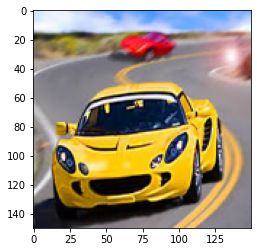

In [ ]:
# testing a brand new image
flat_data =[]
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
print(f' PREDICTED OUTPUT: {y_out}')